In [1]:
def sigmoid(x):
    import math
    return 1 / (1 + math.exp(-x))

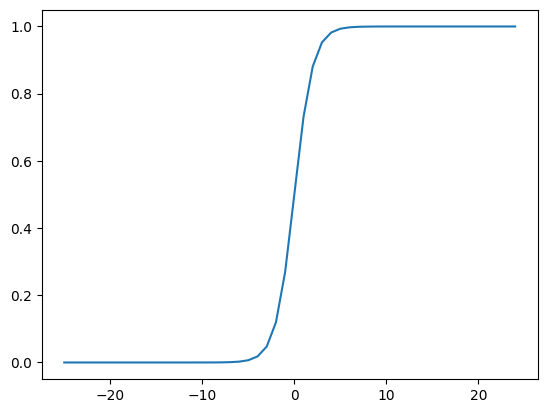

In [2]:
import matplotlib.pyplot as plt

#creating a sequence of number to feed the sigmoid function 
x=list(range(-25, 25))

#sigmoid function output value for each value of x 
sig_val=[]
for i in range(len(x)):
    sig_val.append(sigmoid(x[i]))

#ploting the graph
plt.plot(x,sig_val)
plt.show()

In [3]:
def sigmoid_output(x,m):
    """
    This function will take the independent variables (x) and the weights (m) as the input.
    The inputs must be in a array (matrix) format. 
    Finally, it will multiply the two matrices and fed the result to the sigmoid function.  
    """
    import numpy as np
    #Adding extra one colum of the matrix contains 1. To formulate x0=1, according to the equation. 
    X_New = np.c_[np.ones(len(x)),x]
    eqn_result=X_New@m

    sig=[]
    for i in range(len(eqn_result)):
        sig.append(sigmoid(eqn_result[i]))
    return sig

In [4]:
sigmoid_output([[2,3,4],[5,6,7]],[8,9,10,11])

[1.0, 1.0]

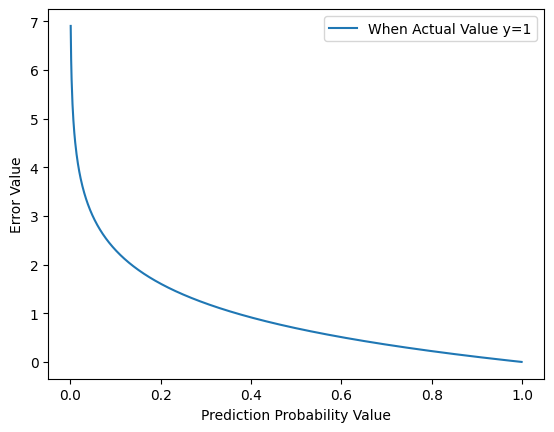

In [5]:
import numpy as np
number=np.arange(0.001,1,0.001)

import matplotlib.pyplot as plt
from math import log

plt.plot(number,[-log(number[i]) for i in range(len(number))],label='When Actual Value y=1')
plt.legend()
plt.xlabel('Prediction Probability Value')
plt.ylabel('Error Value')
plt.show()

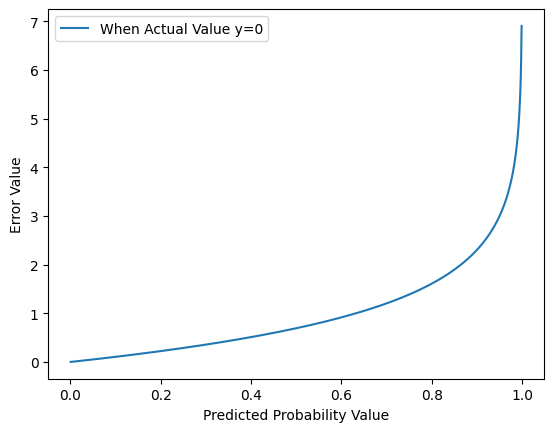

In [6]:
import numpy as np
number=np.arange(0.001,1,0.001)

import matplotlib.pyplot as plt
from math import log

plt.plot(number,[-log(1-number[i]) for i in range(len(number))],label='When Actual Value y=0')
plt.legend()
plt.xlabel('Predicted Probability Value')
plt.ylabel('Error Value')
plt.show()

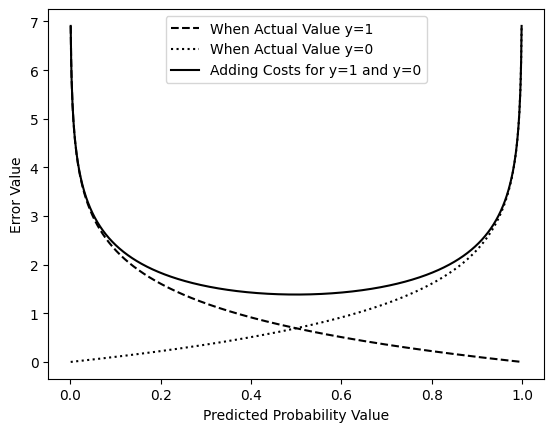

In [7]:
import numpy as np
number=np.arange(0.001,1,0.001)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

from math import log
a=[-log(number[i]) for i in range(len(number))]
b=[-log(1-number[i]) for i in range(len(number))]
z=[(-log(number[i])-log(1-number[i])) for i in range(len(number))]

ax.plot(number,a,'k--',label='When Actual Value y=1')
ax.plot(number,b,'k:',label='When Actual Value y=0')
ax.plot(number,z,'k',label='Adding Costs for y=1 and y=0')
plt.legend()
plt.xlabel('Predicted Probability Value')
plt.ylabel('Error Value')
plt.show()

In [8]:
def cost_function(x,y):
    from math import log

    n=len(x)
    
    result=[]
    for i in range(n):
         try:
           function_res = y[i]*log(x[i]) + (1-y[i])*log(1-x[i])
           result.append(function_res)
         except:
           function_res = y[i]*log(0.000001) + (1-y[i])*log(1-0.999999)
           result.append(function_res)

    cost=-(1/n)*sum(result)

    return cost    

In [9]:
cost_function([0,1,0],[1,0,1])

13.815510557954688

In [10]:
def fit_logistic_regression(X, y, num_iter=10000, alpha=0.01):
    n=len(X)

    m = np.zeros((X_New.shape[1], 1),dtype = float)

    loss=[]

    for i in range(num_iter):

        grad=(1/n) * X.T.dot(sigmoid_output(X,m)- y)
        
        m=m- alpha*grad
        cost=cost_function(sigmoid_output(X,m)- y)

        loss.append(cost)
    
    return m, loss


## Practical Implementation of the Algorithm

In [11]:
import pandas as pd
import numpy  as np 
import matplotlib.pyplot as plot

In [12]:
data=pd.read_csv('titanic.csv')

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
extracted_data=data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

In [15]:
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   Fare      417 non-null    float64
 4   Survived  418 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 16.5+ KB


In [16]:
extracted_data['Age'].fillna(extracted_data['Age'].mean(),inplace=True)
extracted_data['Fare'].fillna(extracted_data['Fare'].mean(),inplace=True)

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [17]:
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   Fare      418 non-null    float64
 4   Survived  418 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 16.5+ KB


In [18]:
mapping={'male':1, 'female':0}
extracted_data['Sex']=extracted_data['Sex'].map(mapping)

/tmp/ipykernel_1557/3091903174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sex']=extracted_data['Sex'].map(mapping)


In [19]:
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   Fare      418 non-null    float64
 4   Survived  418 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 16.5 KB


In [20]:
x=extracted_data[['Pclass', 'Sex', 'Age', 'Fare']].values
y=extracted_data['Survived'].values

In [21]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x = min_max_scaler.fit_transform(x)

In [22]:
train_x,test_x=x[:int((len(x))*.75)],x[int((len(x))*.75)+1:]
train_y,test_y=y[:int((y.size)*.75)],y[int((y.size)*.75)+1:]

### Putting All the Functions Together 

In [23]:
#sigmoid function 
def sigmoid(x):
    import math
    return 1 / (1 + math.exp(-x))


#function for calculating sigmoid value for input features and weights
def sigmoid_output(x,m):
    """
    This function will take the independent variables (x) and the weights (m) as the input.
    The inputs must be in a array (matrix) format. 
    Finally, it will multiply the two matrices and fed the result to the sigmoid function.  
    """
    import numpy as np
    # #Adding extra one colum of the matrix contains 1. To formulate x0=1, according to the equation. 
    
    eqn_result=np.array(x)@m

    sig=[]
    for i in range(len(eqn_result)):
        sig.append(sigmoid(eqn_result[i]))
    return sig


# function for calculating the loss
def cost_function(x,y):
    from math import log

    n=len(x)
    
    result=[]
    for i in range(n):
         try:
           function_res = y[i]*log(x[i]) + (1-y[i])*log(1-x[i])
           result.append(function_res)
         except:
           function_res = y[i]*log(0.000001) + (1-y[i])*log(1-0.999999)
           result.append(function_res)

    cost=-(1/n)*sum(result)

    return cost  


#last function which will fit the model by updating the weights through gradient descent 
def fit_logistic_regression(X, y, num_iter=10000, alpha=0.01):
    n=len(X)
    
    X_New = np.c_[np.ones(len(X)),X]
    #initializing the weights of the coefficients
    m = np.zeros((X_New.shape[1], 1),dtype = float).flatten()

    loss=[]

    for i in range(num_iter):
        # print(i)
        grad=(1/n) * X_New.T.dot(sigmoid_output(X_New,m)- y)
        
        m=m- alpha*grad
        cost=cost_function(sigmoid_output(X_New,m), y)

        loss.append(cost)
    
    return m, loss

In [24]:
m,loss=fit_logistic_regression(train_x,train_y,20000)

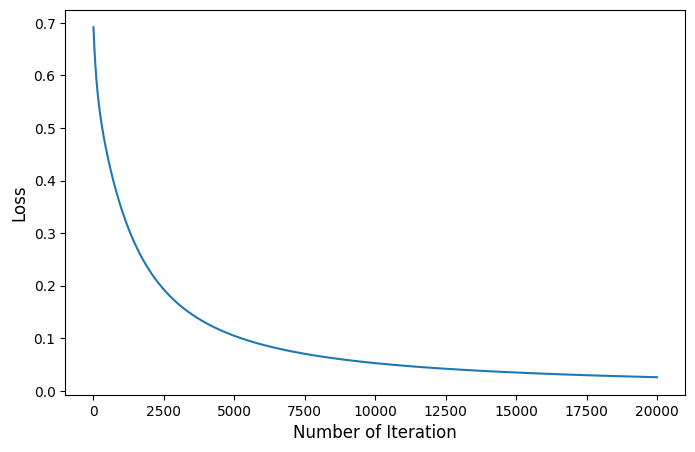

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(np.arange(0,len(loss)),loss) 
plt.xlabel('Number of Iteration',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.show() 

In [26]:
def predict(x,m):
    cls=[]
    X = np.c_[np.ones(len(x)),x]
    result=sigmoid_output(X,m)
    for i in range(len(result)):
        if result[i]<0.5:
            cls.append(0)
        else:
            cls.append(1)
    return cls

In [27]:
y_predict_scratch=predict(test_x,m)

### Logistic Regression Using Scikit-learn 

In [28]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_x,train_y)

LogisticRegression()

In [29]:
y_predict_sklearn=model.predict(test_x)

### Result of Our Scratch Model

In [30]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Generate confusion matrix for the predictions
conf_matrix = confusion_matrix(test_y, y_predict_scratch)
conf_matrix

array([[66,  0],
       [ 0, 38]])

In [31]:
accuracy = accuracy_score(test_y, y_predict_scratch)
precision = precision_score(test_y, y_predict_scratch)
recall = recall_score(test_y, y_predict_scratch)
f1score = f1_score(test_y, y_predict_scratch)

print(f"Accuracy = {accuracy.round(4)}")
print(f"Precision = {precision.round(4)}")
print(f"Recall = {recall.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1 Score = 1.0


### Result of Scikit-learn Model

In [32]:
# Generate confusion matrix for the predictions
conf_matrix = confusion_matrix(test_y, y_predict_sklearn)
conf_matrix

array([[66,  0],
       [ 0, 38]])

In [33]:
accuracy = accuracy_score(test_y, y_predict_sklearn)
precision = precision_score(test_y, y_predict_sklearn)
recall = recall_score(test_y, y_predict_sklearn)
f1score = f1_score(test_y, y_predict_sklearn)

print(f"Accuracy = {accuracy.round(4)}")
print(f"Precision = {precision.round(4)}")
print(f"Recall = {recall.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1 Score = 1.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87efde85-a815-4ac6-9936-9818d283592d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>